In [2]:
import pandas as pd
import numpy as np
import DS_clusters as clusters
from DS_WCS_projections import *
from DS_data_transformation import *
from astropy.coordinates import SkyCoord
from astropy import units as u
from skimage.filters import gaussian

In [3]:
df = fits2df('/home/rt2122/Data/virgo_sweep/sweep-180p010-190p015.fits', filtered=True)

In [4]:
sc = SkyCoord(ra=np.array(df['RA'])*u.degree, dec=np.array(df['DEC'])*u.degree, 
              frame='icrs')
sc_cen = SkyCoord(ra=186.4679*u.degree, dec=12.8710*u.degree, 
                  frame='icrs')
in_rad = sc.separation(sc_cen).degree <= 2.0
np.count_nonzero(in_rad), df.shape[0]

(964825, 3777984)

In [5]:
df = df[in_rad]
df.index = np.arange(df.shape[0])
df.to_csv('/home/rt2122/Data/virgo_sweep/2degree_filtered.csv', index=False)

In [5]:
df = pd.read_csv('/home/rt2122/Data/virgo_sweep/2degree_filtered.csv')

In [6]:
wcs = custom_wcs(186.4679, 12.8710)

/home/rt2122/L/git/data-segmentation-2/modules/DS_WCS_projections.py:39: RuntimeWarning: cdelt will be ignored since cd is present
  w1.wcs.cdelt = w.wcs.cdelt[:2]


In [7]:
pixels = wcs.all_world2pix(np.array(df['RA']), np.array(df['DEC']), 0)
pixels = np.array(pixels, dtype=np.int32).T

In [8]:
pic = np.zeros((2048, 2048, 1))
draw_data(pic, [df['FLUX_G']], pixels)

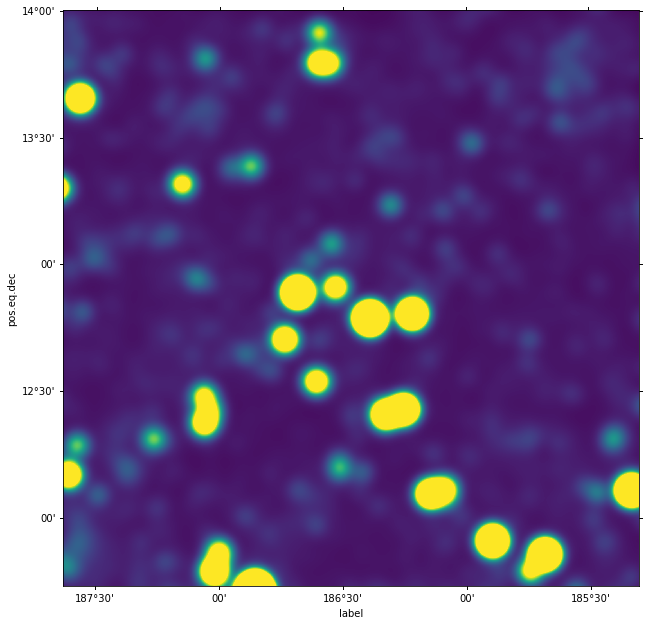

In [10]:
show_pic(gaussian(pic[:,:,0], 30), projection=wcs)

In [10]:
clusters.Virgo.ra, clusters.Virgo.dec

(180.45, 12.716666666666667)

In [42]:
obj = np.array([[186.5489, 12.9541], #left eye 
                [186.2673, 12.8897], #right eye
                [186.4266, 12.8200], #nose
                [186.5242, 13.1148], #up
                [186.9239, 13.0826], #left up
                [186.9432, 13.0117], #left down
                [186.4414, 12.6625]]) #mouth
obj[0]

array([186.5489,  12.9541])

In [43]:
pixels_obj = wcs.all_world2pix(obj[:, 0], obj[:, 1], 0)
pixels_obj = np.array(pixels_obj, dtype=np.int32).T

In [44]:
obj_pic = draw_circles(pixels_obj, np.ones(obj.shape[0]), 
                       shape=(2048, 2048, 1), coef=0.03)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


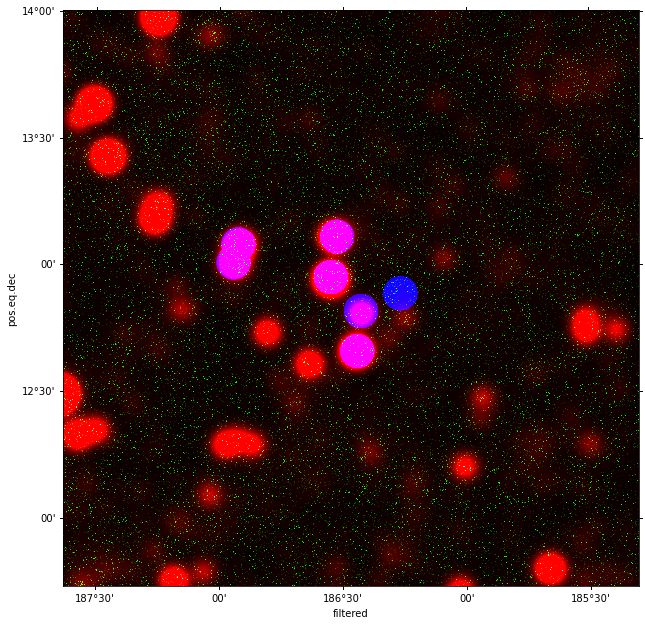

In [45]:
show_pic(np.dstack([gaussian(np.flipud(np.rot90(pic)), 30), 
                    np.flipud(np.rot90(pic)), 
                    np.flipud(np.rot90(obj_pic))]), projection=wcs, label='filtered')